In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training2-titanic-data/titanic.csv


In [ ]:
## DAY-1
data = []
n= int(input('number of employees: '))
for i in range(n):
    print(f"\nEnter details for employee {i+1}:")
    name = input("Name: ")
    age = int(input("Age: "))
    department = input("Department: ")
    salary = int(input("Salary: "))
    
    # append to list as dictionary
    data.append({
        "name": name,
        "age": age,
        "department": department,
        "salary": salary
    })           

df = pd.DataFrame(data)

df.head(3)

df[['name', 'salary']]

avg_sal = df['salary'].mean()
avg_sal

max_sal = df['salary'].max()
print(df['name'][df['salary'] == max_sal])

np.std(df['salary'])

age = np.array(df['age'])
double = age*2
double

In [ ]:
# DAY-3
df = pd.read_csv('/kaggle/input/training2-titanic-data/titanic.csv')
df

In [ ]:
df.isnull().sum()

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(columns=['PassengerId', 'Cabin', 'Name', 'Ticket'], inplace=True)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [ ]:
df.head(10)

In [ ]:
df.isnull().sum().sum()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode Sex
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df

In [ ]:
df['Embarked'].value_counts()

In [ ]:
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [ ]:
df

In [ ]:
df['Embarked_Q'] = df['Embarked_Q'].astype(int)
df['Embarked_S'] = df['Embarked_S'].astype(int)


In [ ]:
df

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define models in a dictionary
model = RandomForestClassifier(n_estimators=200,random_state = 42)
# Loop through models
model.fit(X_train, y_train)
y_pred = model.predict(X_test)    
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))
print("-" * 50)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
df

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

X_tensor = torch.tensor(X.values, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y)

train_dataset = TensorDataset(X_train_t, y_train_t)
test_dataset = TensorDataset(X_test_t, y_test_t)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class titanicNN(nn.Module):
    def __init__(self, inp):
        super(titanicNN, self).__init__()
        self.fc1 = nn.Linear(inp, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64,128)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(128, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

model = titanicNN(X.shape[1])
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epochs = 1000
for EPOCH in range(epochs):
    model.train()
    for x_batch , y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(x_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if (EPOCH+1)%10 == 0:
        print(f"Epoch {EPOCH+1}/{epochs}, Loss: {loss.item():.4f}")

model.eval()
with torch.no_grad():
    y_pred_probs = model(X_test_t)
    y_pred_labels = (y_pred_probs > 0.5).int()
    acc = (y_pred_labels.eq(y_test_t.int()).sum().item()) / y_test_t.shape[0]
    print(f"Test Accuracy: {acc:.4f}")

In [ ]:
#### DAY-4
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)

def run(show_plot=True, verbose=True, random_state=69):
    data = load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = LogisticRegression(
        max_iter=1000, solver='lbfgs', C=1.0, random_state=random_state
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        'model': 'LogisticRegression',
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, digits=4)
    }

    if verbose:
        print('======= LOGISTIC REGRESSION =======')
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"F1 Score: {metrics['f1']:.4f}")
        print(f"AUC: {metrics['auc']:.4f}")
        print("Confusion Matrix:\n", metrics['confusion_matrix'])
        print("Classification Report:\n", metrics['classification_report'])

    if show_plot:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {metrics['auc']:.4f}")
        plt.plot([0, 1], [0, 1], '--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Logistic Regression ROC Curve')
        plt.legend()
        plt.show()

    return metrics


if __name__ == '__main__':
    run()


======= DECISION TREE =======
Accuracy: 0.9298
F1 Score: 0.9444
AUC: 0.9246
Confusion Matrix:
 [[38  4]
 [ 4 68]]
Classification Report:
               precision    recall  f1-score   support

           0     0.9048    0.9048    0.9048        42
           1     0.9444    0.9444    0.9444        72

    accuracy                         0.9298       114
   macro avg     0.9246    0.9246    0.9246       114
weighted avg     0.9298    0.9298    0.9298       114



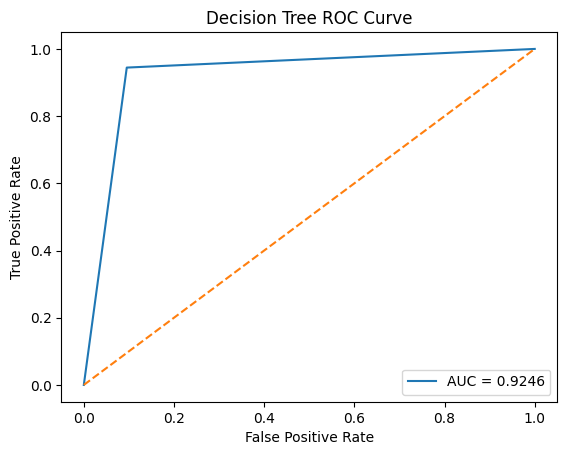

In [2]:
### DAY-5
### DECISION TREES

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report,
    confusion_matrix, roc_auc_score, roc_curve
)

def run(show_plot=True, verbose=True, random_state=69):
    data = load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=random_state, stratify=y
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = DecisionTreeClassifier(
        criterion="gini",   # or "entropy"
        max_depth=None,     # try limiting to prevent overfitting
        random_state=random_state
    )
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    metrics = {
        'model': 'DecisionTree',
        'accuracy': accuracy_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'auc': roc_auc_score(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, digits=4)
    }

    if verbose:
        print('======= DECISION TREE =======')
        print(f"Accuracy: {metrics['accuracy']:.4f}")
        print(f"F1 Score: {metrics['f1']:.4f}")
        print(f"AUC: {metrics['auc']:.4f}")
        print("Confusion Matrix:\n", metrics['confusion_matrix'])
        print("Classification Report:\n", metrics['classification_report'])

    if show_plot:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {metrics['auc']:.4f}")
        plt.plot([0, 1], [0, 1], '--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Decision Tree ROC Curve')
        plt.legend()
        plt.show()

    return metrics


if __name__ == '__main__':
    run()
